In [1]:
# import urllib.request, json 
# import pandas as pd

# # 5min BTC/USDT chart form Poloniex since 2017-01-01T00:00:00+00:00 till 2018-10-14T20:00:00+00:00
# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1483228800&end=1539547200&period=300") as url:
#     data_USDT_BTC = json.loads(url.read().decode())
# print("USDT_BTC downloaded")
    
# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1483228800&end=1539547200&period=300") as url:
#     data_BTC_ETH = json.loads(url.read().decode())
# print("BTC_ETH downloaded")

# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XRP&start=1483228800&end=1539547200&period=300") as url:
#     data_BTC_XRP = json.loads(url.read().decode())
# print("BTC_XRP downloaded")

# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_LTC&start=1483228800&end=1539547200&period=300") as url:
#     data_BTC_LTC = json.loads(url.read().decode())
# print("BTC_LTC downloaded")

# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XMR&start=1483228800&end=1539547200&period=300") as url:
#     data_BTC_XMR = json.loads(url.read().decode())
# print("BTC_XMR downloaded")

# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_DASH&start=1483228800&end=1539547200&period=300") as url:
#     data_BTC_DASH = json.loads(url.read().decode())
# print("BTC_DASH downloaded")

# with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETC&start=1483228800&end=1539547200&period=300") as url:
#     data_BTC_ETC = json.loads(url.read().decode())
# print("BTC_ETC downloaded")

# print(data_USDT_BTC[0])

# df = pd.DataFrame(data=data_USDT_BTC, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
# df['BTC_ETH'] = pd.DataFrame(data=data_BTC_ETH, columns=['weightedAverage']).iloc[:, 0]
# df['BTC_XRP'] = pd.DataFrame(data=data_BTC_XRP, columns=['weightedAverage']).iloc[:, 0]
# df['BTC_LTC'] = pd.DataFrame(data=data_BTC_LTC, columns=['weightedAverage']).iloc[:, 0]
# df['BTC_XMR'] = pd.DataFrame(data=data_BTC_XMR, columns=['weightedAverage']).iloc[:, 0]
# df['BTC_DASH'] = pd.DataFrame(data=data_BTC_DASH, columns=['weightedAverage']).iloc[:, 0]
# df['BTC_ETC'] = pd.DataFrame(data=data_BTC_ETC, columns=['weightedAverage']).iloc[:, 0]
# df.head()

# df = df.fillna(method='ffill')
# df. to_csv("poloniex_usdt_btc_20170101_many_coins_300.csv", sep=";", index=False)

In [1]:
import csv
import numpy as np
import pandas as pd

df = pd.read_csv("poloniex_usdt_btc_20170101_many_coins_300.csv", sep=";", index_col=None)

df.head()

,date,open,high,low,close,volume,BTC_ETH,BTC_XRP,BTC_LTC,BTC_XMR,BTC_DASH,BTC_ETC
0,1483228800,965.000001,965.000001,964.000000,964.000001,5398.837117,0.008357,0.000007,0.004499,0.014309,0.011764,0.001457
1,1483229100,966.150000,966.150000,964.000002,964.000002,84.302118,0.008399,0.000007,0.004487,0.014311,0.011764,0.001450
2,1483229400,964.050000,966.149988,962.028165,964.000000,2638.676171,0.008428,0.000007,0.004487,0.014362,0.011764,0.001448
3,1483229700,962.028165,964.000000,961.700000,962.200001,3415.272309,0.008490,0.000007,0.004500,0.014367,0.011764,0.001442
4,1483230000,964.000011,964.677377,962.769304,962.849999,80.287691,0.008516,0.000007,0.004525,0.014369,0.011738,0.001439


In [2]:
print("Shape of whole dataset: ", df.shape)

(187729, 12)


In [3]:
# Turn dataframe into a numpy floating point array
df_values = df.values
timestamps = df_values[:, 0]
dataset = df_values[:, 1:].astype("float")

In [4]:
# Split the dataset into training (90%), cross validation (5%) and test (5%) set
samples_num = dataset.shape[0]

valid_split = 0.1
test_split = 0.1

dataset_train = dataset[0:int(samples_num * (1-valid_split-test_split))]
dataset_valid = dataset[int(samples_num * (1-valid_split-test_split)):int(samples_num * (1-test_split))]
dataset_test = dataset[int(samples_num * (1-test_split)):samples_num]

print(dataset_train.shape)
print(dataset_valid.shape)
print(dataset_test.shape)

(150183, 11)
(18773, 11)
(18773, 11)


In [5]:
# Makes a training examples from year data with a timesteps window size

def makeXy(data, timesteps):
    X = []
    y = []
    
    for i in range(timesteps, data.shape[0]-2):
        X.append(list(data[i-timesteps:i]))
        
        y.append(sum(data[i:i+2])/2)
        
    X, y = np.array(X), np.array(y)
    return X, y

In [6]:
import numpy as np

# Create training examples
timestep = 250

train_X, train_y = makeXy(dataset_train, timestep)
valid_X, valid_y = makeXy(dataset_valid, timestep)
test_X, test_y = makeXy(dataset_test, timestep)
    
print(train_X.shape)
print(train_y.shape)

(149931, 250, 11)
(149931, 11)


In [7]:
train_y = np.expand_dims(train_y, axis=1)
valid_y = np.expand_dims(valid_y, axis=1)
test_y = np.expand_dims(test_y, axis=1)

print(train_X.shape)
print(train_y.shape)

(149931, 250, 11)
(149931, 1, 11)


In [8]:
from sklearn.preprocessing import MinMaxScaler

for i in range(train_X.shape[0]):
    scaler = MinMaxScaler().fit(np.array(train_X[i]))
    train_X[i] = scaler.transform(train_X[i])
    train_y[i] = scaler.transform(train_y[i])
    
for i in range(valid_X.shape[0]):
    scaler = MinMaxScaler().fit(np.array(valid_X[i]))
    valid_X[i] = scaler.transform(valid_X[i])
    valid_y[i] = scaler.transform(valid_y[i])
    
for i in range(test_X.shape[0]):
    scaler = MinMaxScaler().fit(np.array(test_X[i]))
    test_X[i] = scaler.transform(test_X[i])
    test_y[i] = scaler.transform(test_y[i])


In [9]:
print(train_X.shape)
print(train_y.shape)

print(train_X[0])
print(train_y[0])

(149931, 250, 11)
(149931, 1, 11)
[[0.14750805 0.10251079 0.15392894 ... 0.93515236 0.68693481 0.48784906]
 [0.17225628 0.12735103 0.15392899 ... 0.93648998 0.68692418 0.45625663]
 [0.12706383 0.12735077 0.11044434 ... 0.9920395  0.68692418 0.44794981]
 ...
 [0.9516237  1.         1.         ... 0.18434217 0.20987195 0.0334924 ]
 [1.         0.95817215 0.95589429 ... 0.30786045 0.19524999 0.07449629]
 [0.94375594 0.96651966 0.99188408 ... 0.25846619 0.19977685 0.09402616]]
[[ 1.00831658  0.97731977  1.01399041  1.00895228  0.09638272  0.03986495
  -0.00877193  0.15625245  0.26452357  0.06902928  0.05934076]]


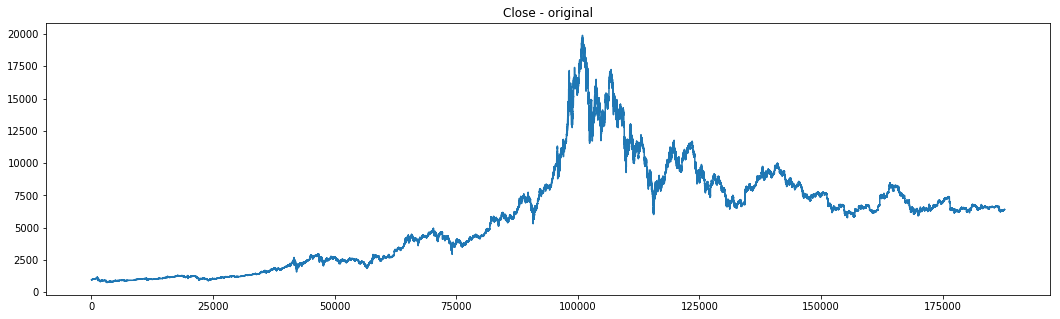

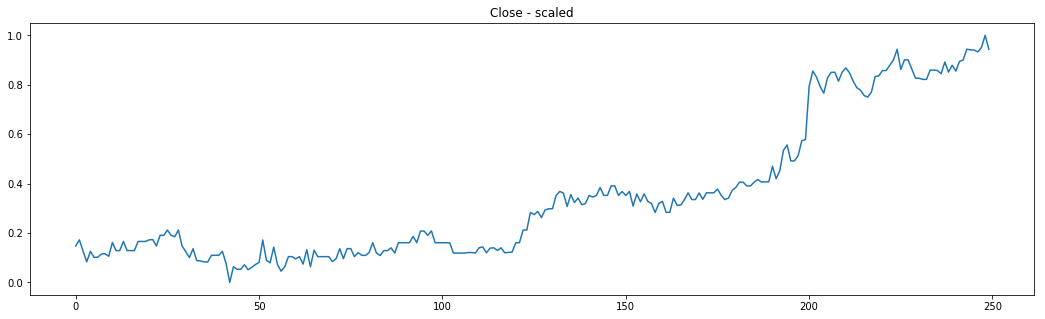

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18, 5))
plt.title('Close - original')
plt.plot(dataset[:,0])
plt.show()

plt.figure(figsize=(18, 5))
plt.title('Close - scaled')
plt.plot(train_X[0,:,0])
plt.show()

In [11]:
import tensorflow as tf
from keras import backend as K

num_cores = 6

num_CPU = 1
num_GPU = 1

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU})
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
K.set_session(session)

from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.callbacks import Callback
from keras.optimizers import Adam
from keras.layers import Dropout, Conv1D, Flatten, MaxPooling1D, LSTM, BatchNormalization, Input, Lambda, TimeDistributed, CuDNNLSTM
from keras import regularizers
from tensorflow import set_random_seed

# Set random seed to always predict the same values
np.random.seed(1)
set_random_seed(2) # Tensoflow

Using TensorFlow backend.


In [12]:
# Saving loss and acc values

class TrainingHistory(Callback):

    def on_train_begin(self, logs={}):
        self.losses = []
        self.valid_losses = []
        self.accs = []
        self.valid_accs = []
        self.epoch = 0
    
    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.valid_losses.append(logs.get('val_loss'))
        self.accs.append(logs.get('acc'))
        self.valid_accs.append(logs.get('val_acc'))
        self.epoch += 1
            
history = TrainingHistory()

In [13]:
# train_X = np.expand_dims(train_X, axis=2)
print(train_X.shape)
print(train_y.shape)

train_y = train_y.reshape(-1,train_X.shape[2])
valid_y = valid_y.reshape(-1,train_X.shape[2])
test_y = test_y.reshape(-1,train_X.shape[2])

print(train_y[0].shape)

(149931, 250, 11)
(149931, 1, 11)
(11,)


In [38]:
# Create model
model = Sequential()

# model.add(Conv1D(kernel_size = (3), filters = 64, input_shape=train_X[0].shape, activation='relu'))
# model.add(MaxPooling1D(pool_size = (2), strides=(2)))
# model.add(Conv1D(kernel_size = (3), filters = 64, activation='relu'))
# model.add(MaxPooling1D(pool_size = (2), strides=(2)))
# model.add(Dense(512, activation='relu'))
# model.add(LSTM(128, input_shape=train_X[0].shape))
# # model.add(Flatten(input_shape=train_X[0].shape))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(train_y[0].shape[0]))

# 0.0037
# model.add(LSTM(128, return_sequences = True, input_shape = train_X[0].shape))
# model.add(TimeDistributed(Dense(1)))
# model.add(LSTM(128, return_sequences = True))
# model.add(TimeDistributed(Dense(1)))
# model.add(LSTM(64))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(train_y[0].shape[0]))

# model.add(LSTM(128, input_shape=train_X[0].shape))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(train_y[0].shape[0]))

model.add(Conv1D(kernel_size = (3), filters = 64, input_shape=train_X[0].shape, activation='relu'))
# model.add(MaxPooling1D(pool_size = (2), strides=(2)))
model.add(CuDNNLSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.add(CuDNNLSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(train_y[0].shape[0]))
model.add(Activation('linear'))

# Kurva jó első próbálkozás
# model.add(LSTM(128, input_shape=train_X[0].shape))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(train_y[0].shape[0]))

# # model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# # model.add(Dense(256, activation='relu'))
# model.add(Dense(train_y[0].shape[0]))

# last_timestep = Lambda(lambda x: x[:, -1, :])(lstm_layer)

# inputs = Input(shape=train_X[0].shape)
# x = LSTM(128, return_sequences = True, stateful=True, batch_input_shape=(2048, 250, train_X[0].shape))(inputs) # batch_input_shape=(batch_size, timesteps, data_dim)
# # x = Lambda(lambda x : x[:,::5,:])(x) # Last 200 return_sequences of lstm layer
# x = LSTM(64, return_sequences = True, stateful=True)(x)
# x = LSTM(64, stateful=True)(x)
# # x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(train_y[0].shape[0])(x)

# model = Model(inputs=inputs, outputs=x)
    

model.compile(loss='mean_squared_error', optimizer= Adam())

# model.save('model.h5') # Saving model for prediction


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 248, 64)           2176      
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 248, 128)          99328     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 248, 10)           1290      
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 128)               71680     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 11)                1419      
_________________________________________________________________
activation_3 (Activation)    (None, 11)                0         
Total para

In [40]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    from keras import backend as K

    shapes_mem_count = 0
    for l in model.layers:
        single_layer_mem = 1
        for s in l.output_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in set(model.trainable_weights)])
    non_trainable_count = np.sum([K.count_params(p) for p in set(model.non_trainable_weights)])

    total_memory = 4.0*batch_size*(shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3)
    return gbytes

In [41]:
print(get_model_memory_usage(1024, model))

0.926


In [42]:
# Setting up early stopping and weight saving on actually best solutions

from keras.callbacks import EarlyStopping
patience=5
early_stopping=EarlyStopping(patience=patience, verbose=1)

from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

In [43]:
# Training model

model.fit(train_X, train_y,
          batch_size=1024,
          epochs=100,
          validation_data=(valid_X,valid_y), 
          callbacks=[checkpointer, early_stopping, history],
          shuffle= True)

Train on 149931 samples, validate on 18521 samples
Epoch 1/100
149931/149931 [==============================] - 28s 187us/step - loss: 0.0342 - val_loss: 0.0155

Epoch 00001: val_loss improved from inf to 0.01546, saving model to weights.hdf5
Epoch 2/100
149931/149931 [==============================] - 27s 177us/step - loss: 0.0085 - val_loss: 0.0118

Epoch 00002: val_loss improved from 0.01546 to 0.01181, saving model to weights.hdf5
Epoch 3/100
149931/149931 [==============================] - 27s 177us/step - loss: 0.0067 - val_loss: 0.0105

Epoch 00003: val_loss improved from 0.01181 to 0.01048, saving model to weights.hdf5
Epoch 4/100
149931/149931 [==============================] - 26s 176us/step - loss: 0.0060 - val_loss: 0.0098

Epoch 00004: val_loss improved from 0.01048 to 0.00978, saving model to weights.hdf5
Epoch 5/100
149931/149931 [==============================] - 27s 178us/step - loss: 0.0055 - val_loss: 0.0094

Epoch 00005: val_loss improved from 0.00978 to 0.00943, sa

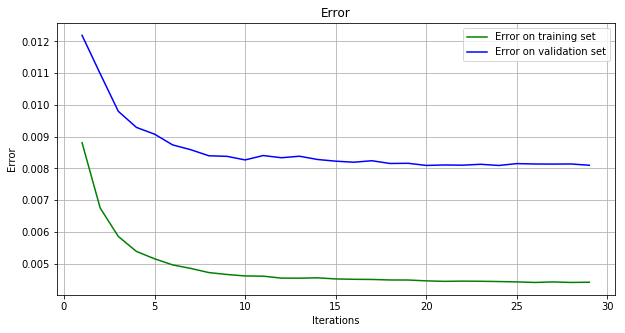

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.title('Error')
plt.plot(np.arange(history.epoch)[1:], history.losses[1:], color ='g', label='Error on training set') 
plt.plot(np.arange(history.epoch)[1:], history.valid_losses[1:], color ='b', label='Error on validation set')
plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid(True)
plt.show()

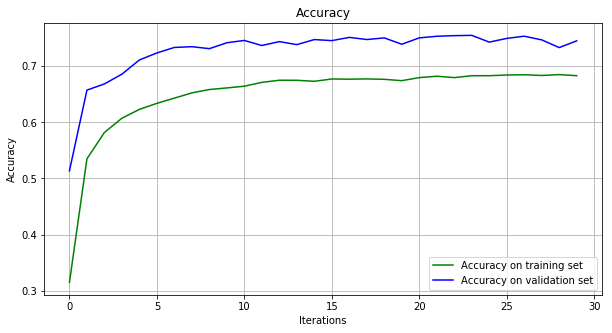

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy')
plt.plot(np.arange(history.epoch), history.accs, color ='g', label='Accuracy on training set') 
plt.plot(np.arange(history.epoch), history.valid_accs, color ='b', label='Accuracy on validation set')
plt.legend(loc='lower right')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [35]:
import sys
from keras.models import load_model
from sklearn.externals import joblib

model.load_weights("weights.hdf5")

pred_data, _ = makeXy(dataset_test, timestep)

prediction_range = 25
prediction_lookback = timestep

predictions = np.zeros(pred_data[0].shape)       
scalers = []
to_predict = []
        
for i in range(0, (pred_data.shape[0]-prediction_range)//prediction_range * prediction_range, prediction_range):    
    r = pred_data[i]
    scaler = MinMaxScaler().fit(r)
    r = scaler.transform(r)

    scalers.append(scaler)
    to_predict.append(r)
    
to_predict = np.array(to_predict)

for candles in range(prediction_range):
    d = to_predict[:, -prediction_lookback:] 
    next = model.predict(d)
    next = np.expand_dims(next, axis=1)
    to_predict = np.append(to_predict, next, axis=1) # Add prediction to known candles

print(to_predict.shape)

for i in range(to_predict.shape[0]):
    inverse_scaled = scalers[i].inverse_transform(to_predict[i, -prediction_range:, :])
    predictions = np.append(predictions, inverse_scaled, axis=0)

(739, 275, 11)


In [36]:
print(predictions.shape)

test_close = pred_data[prediction_lookback:,0, 0]
pred_close = predictions[prediction_lookback:, 0]

print(test_close.shape)
print(pred_close.shape)

(18725, 11)
(18271,)
(18475,)


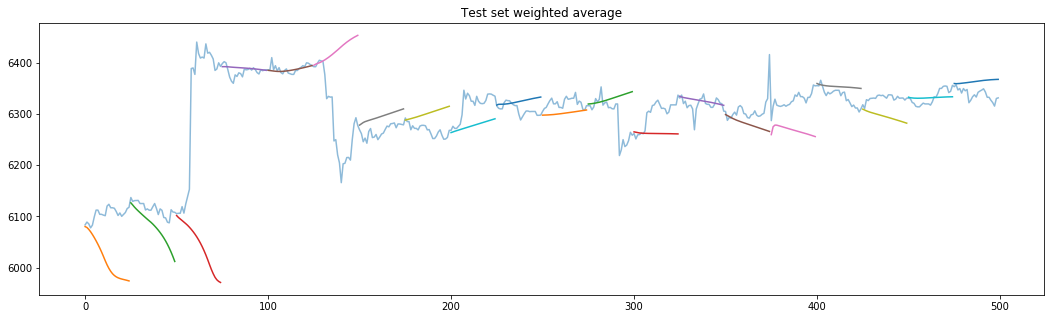

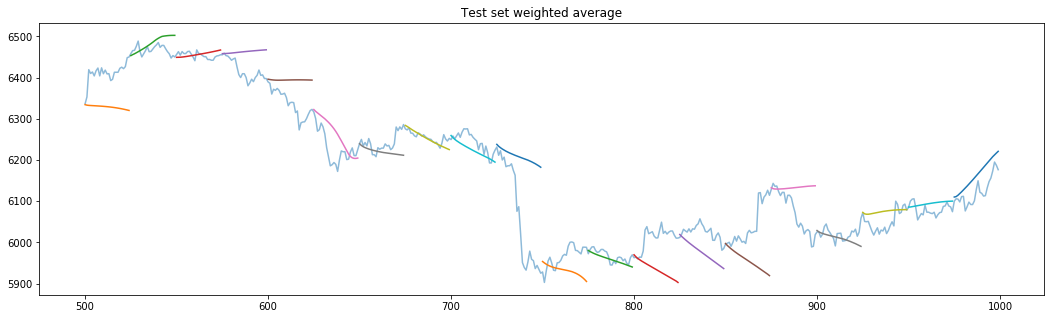

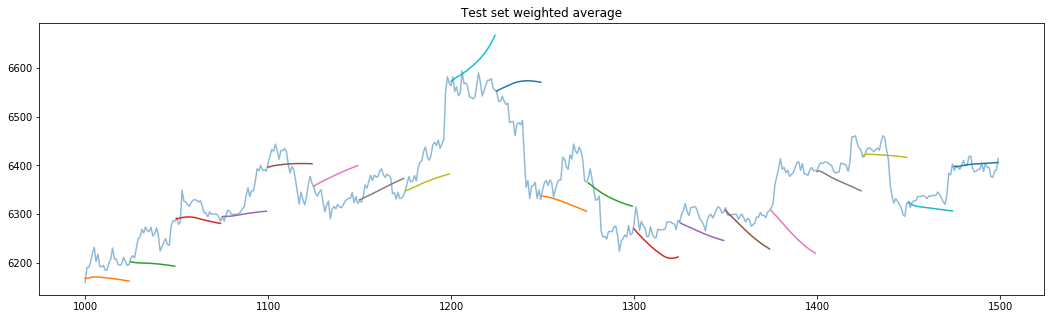

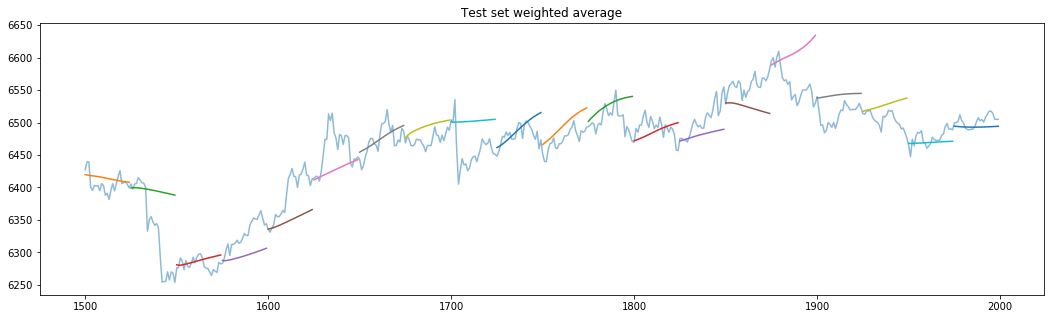

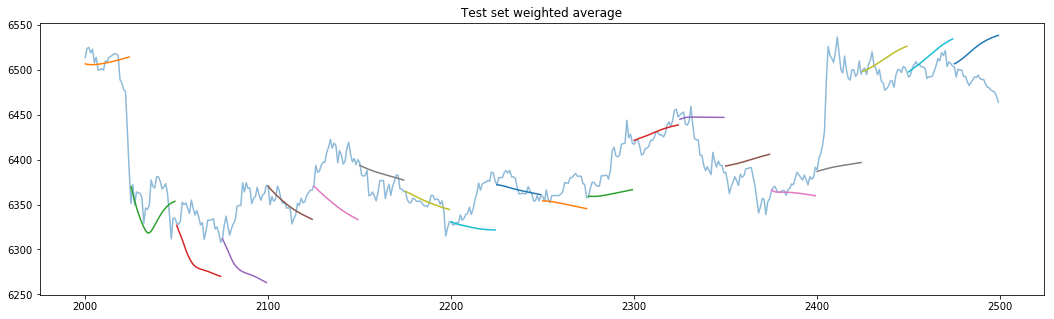

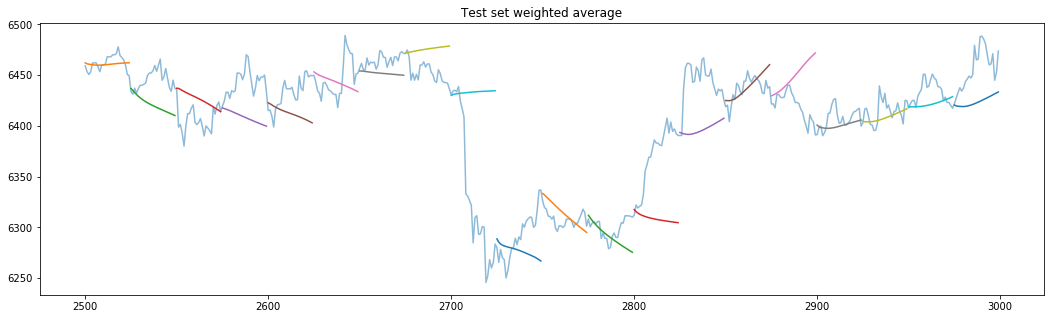

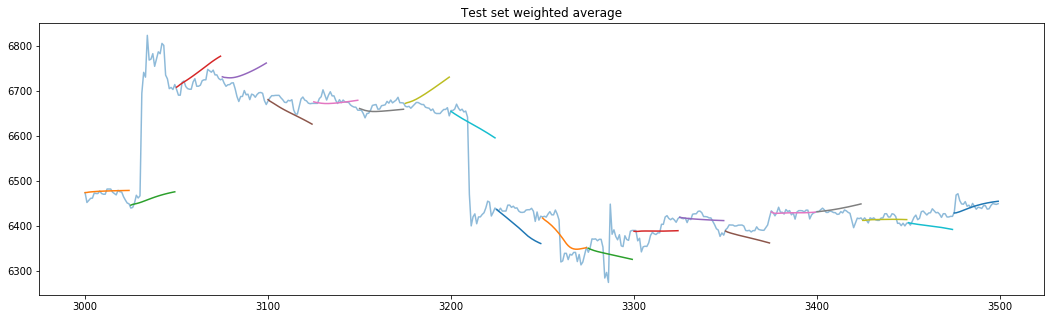

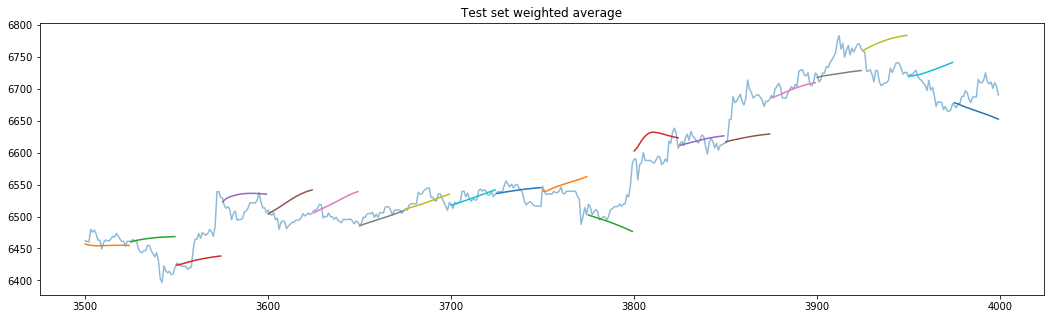

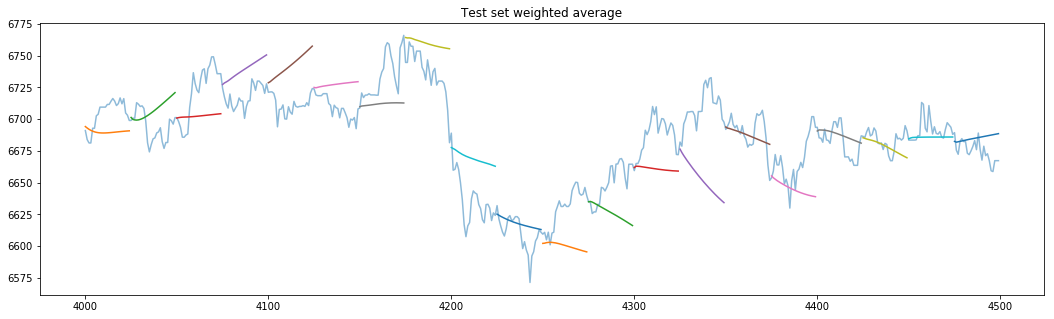

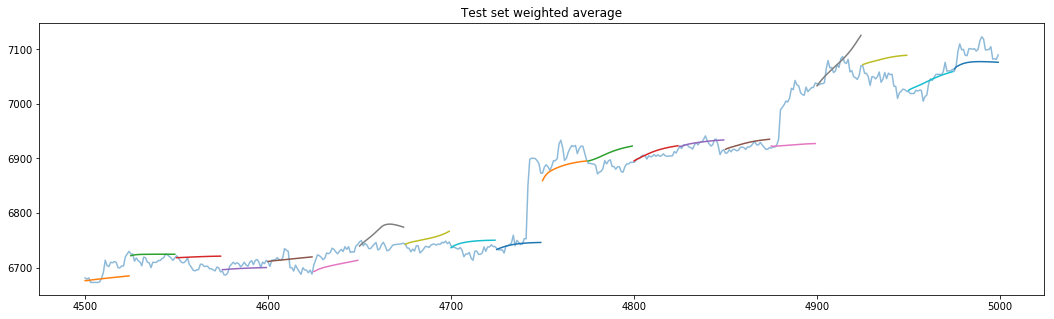

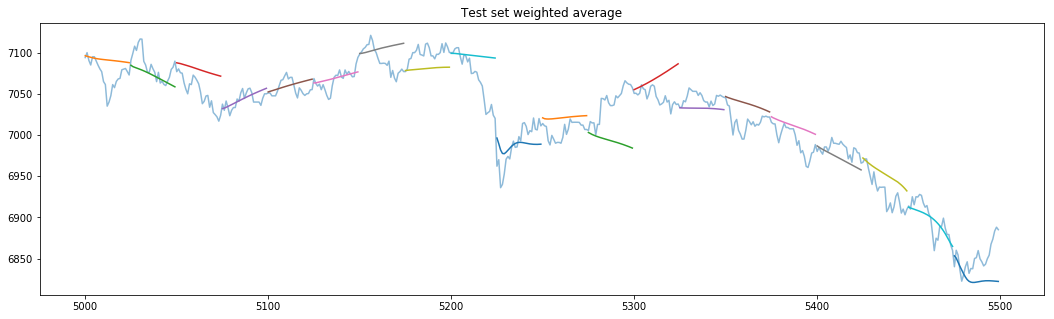

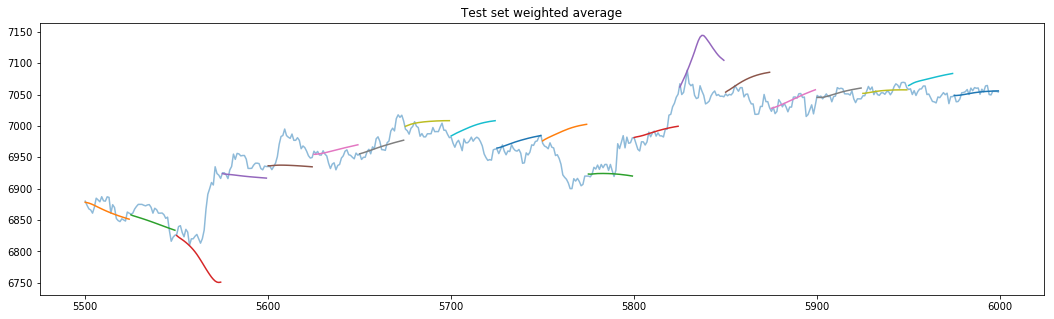

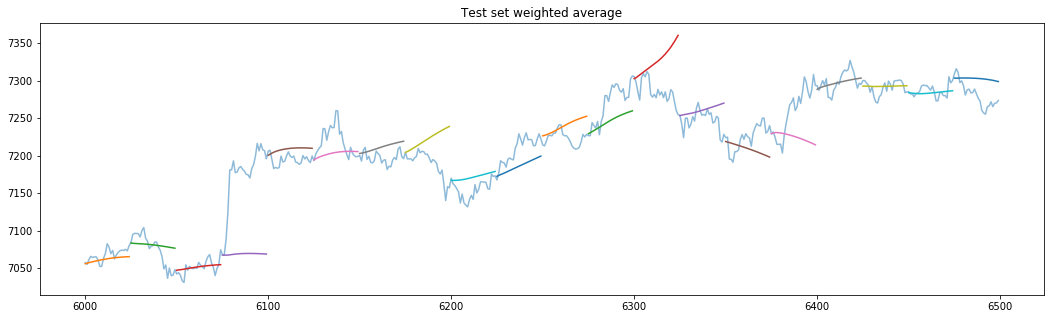

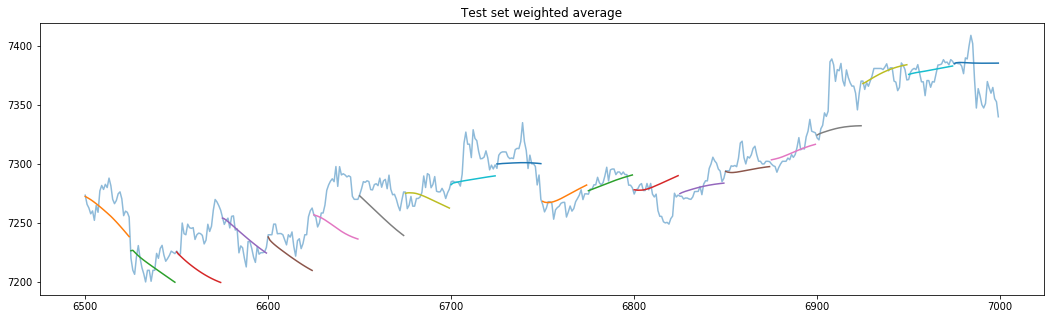

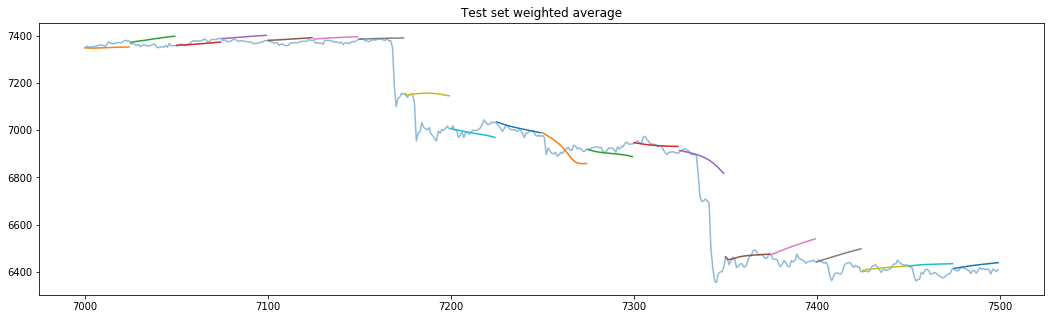

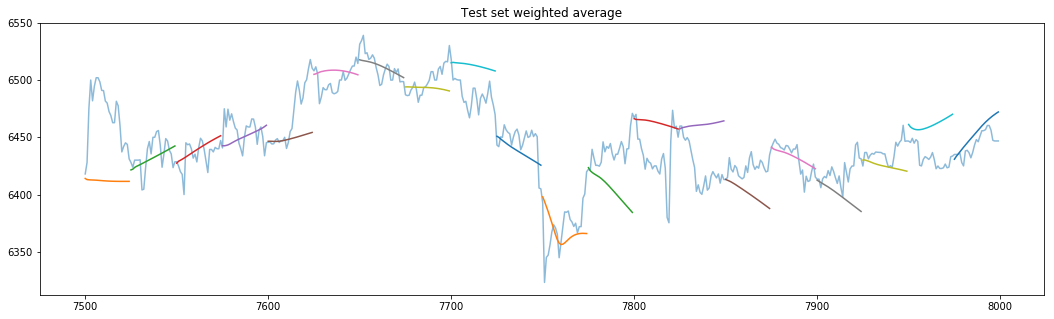

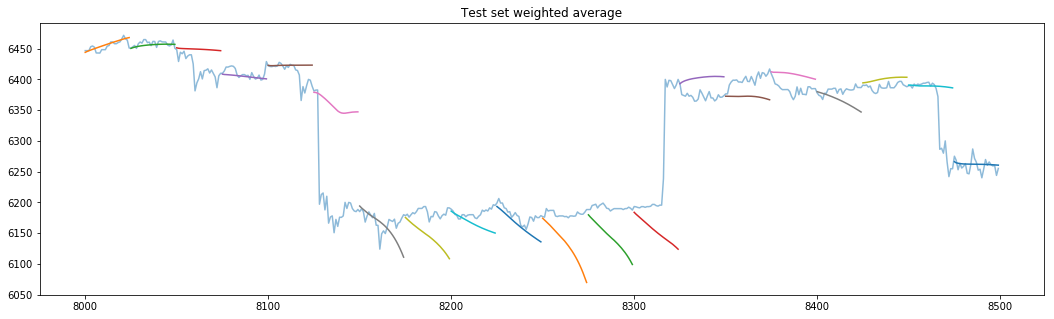

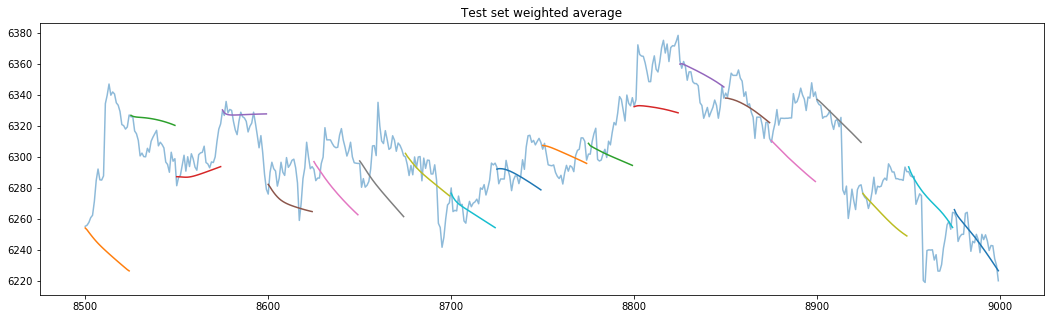

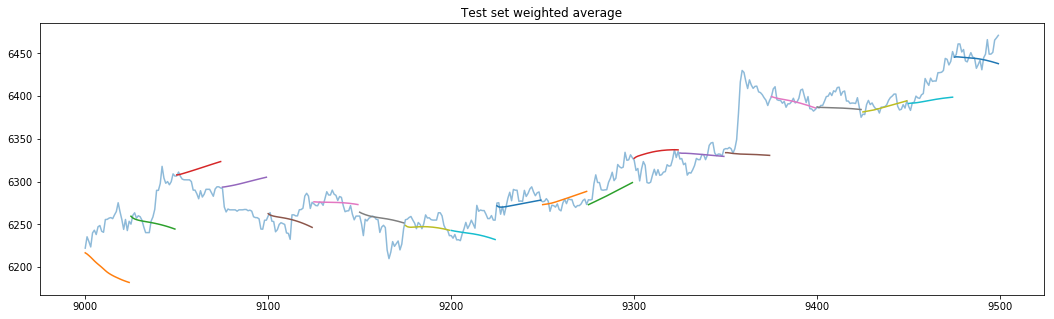

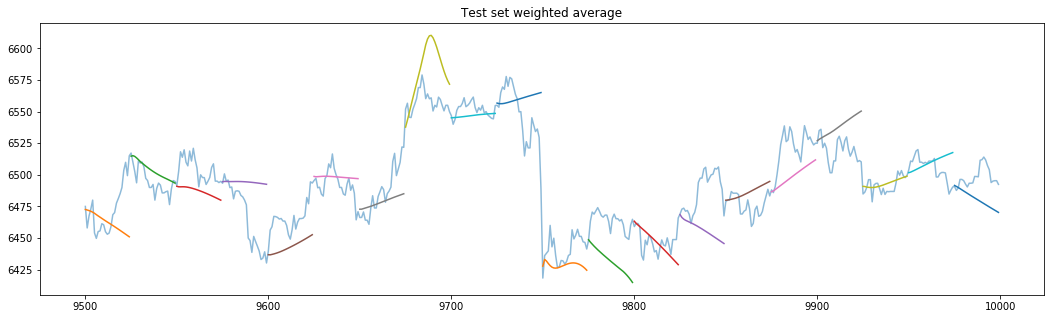

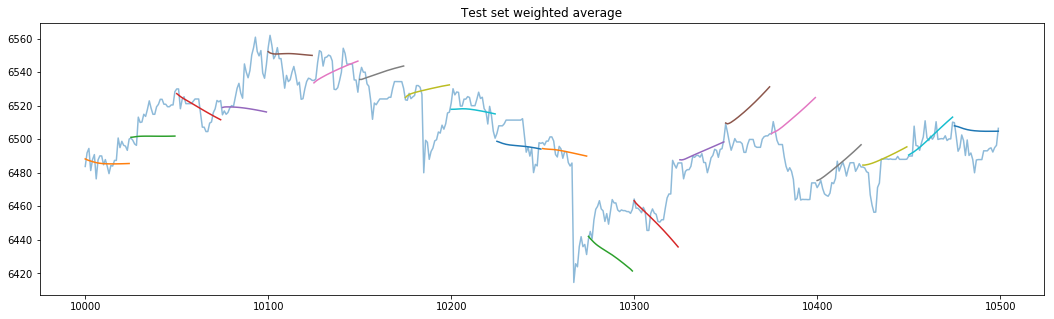

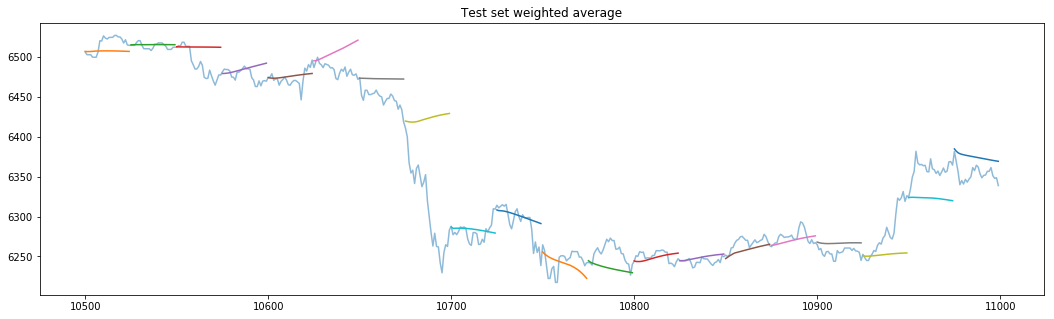

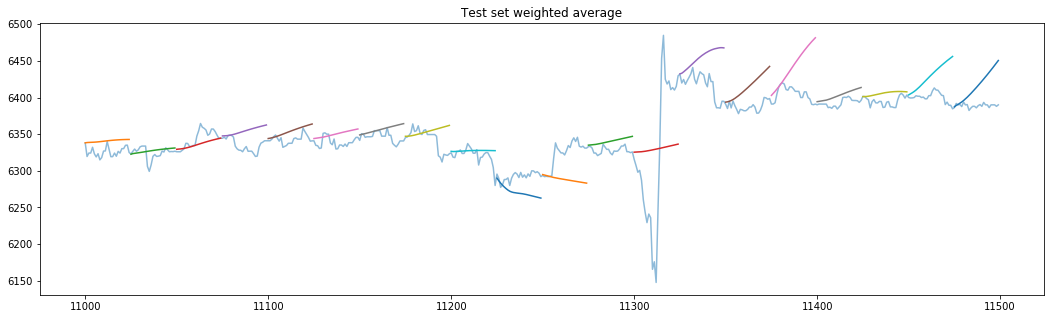

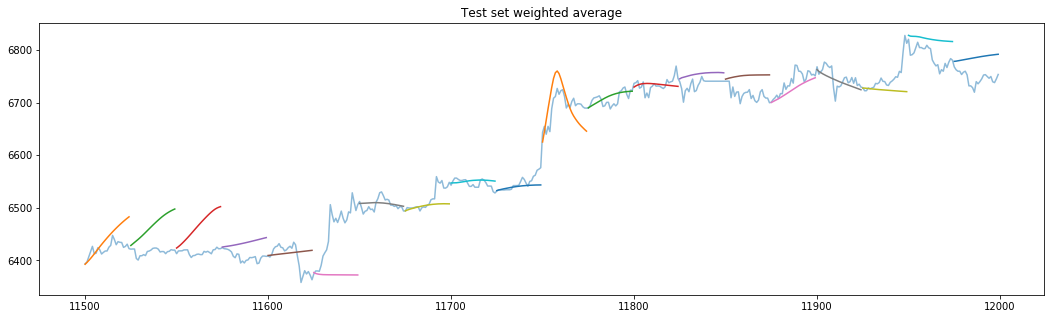

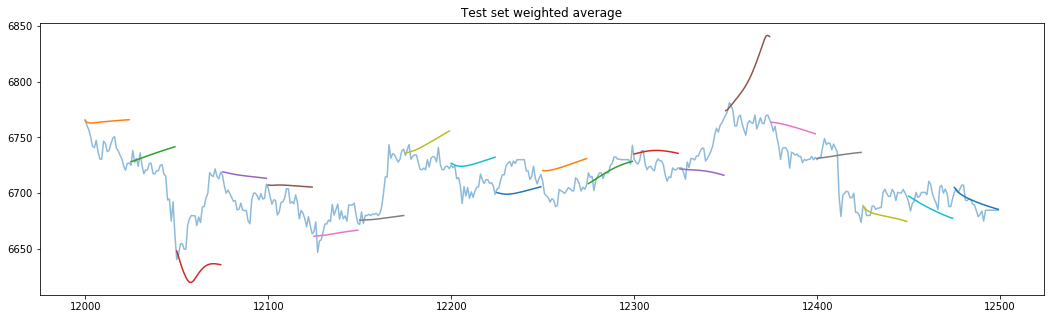

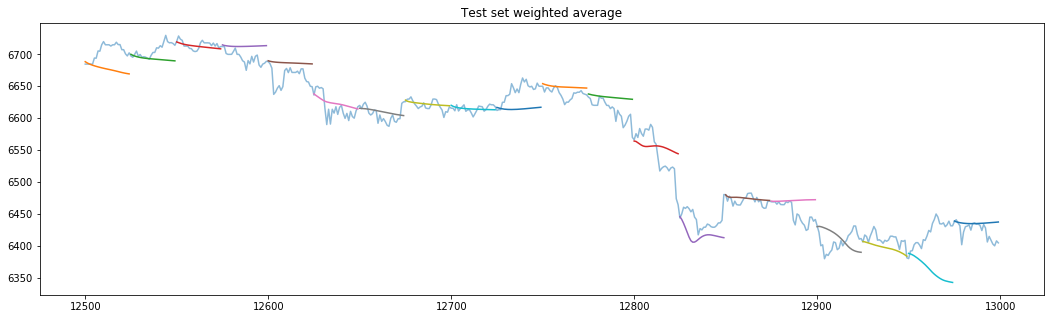

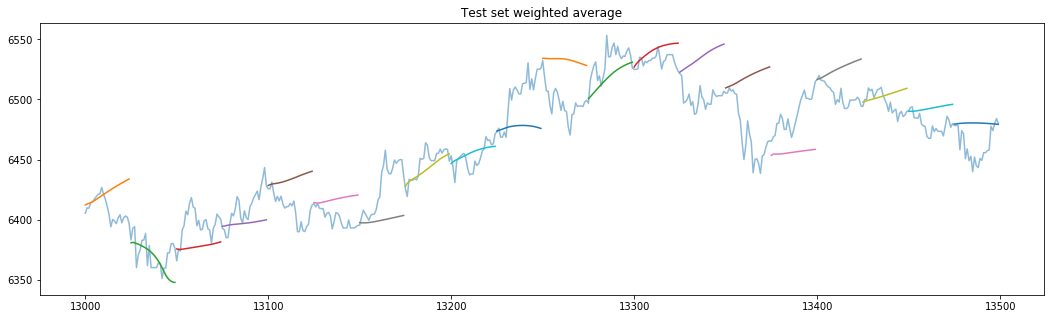

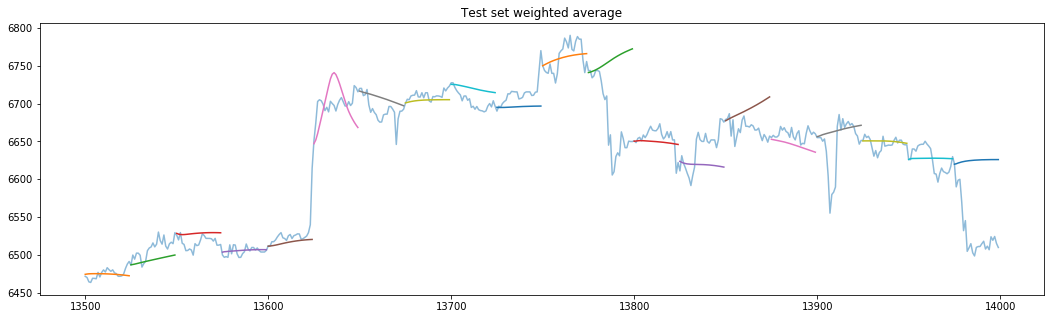

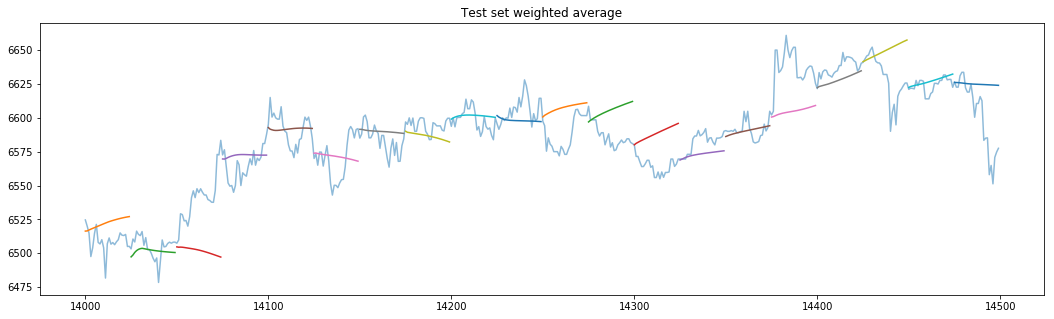

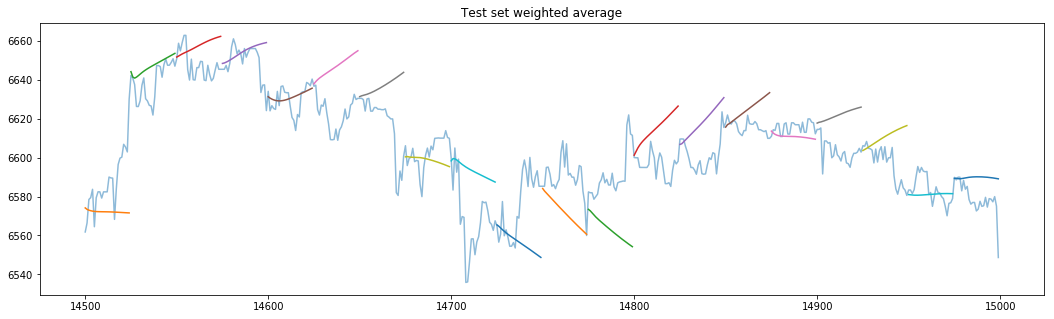

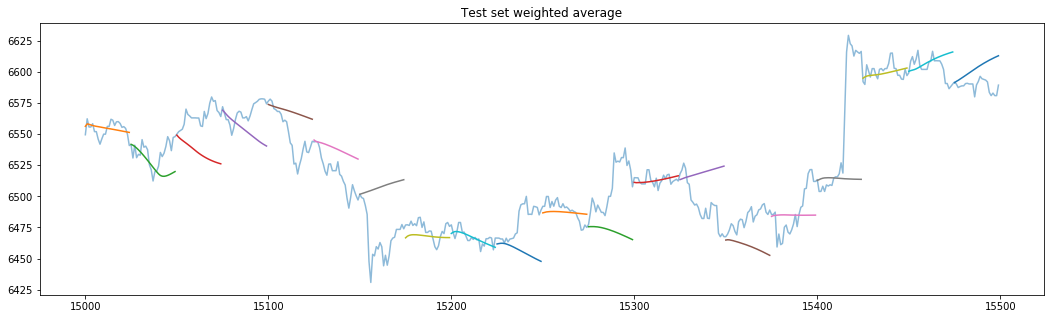

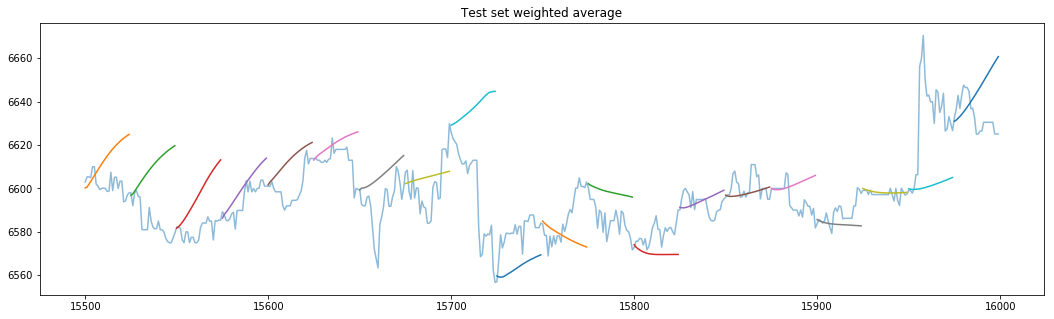

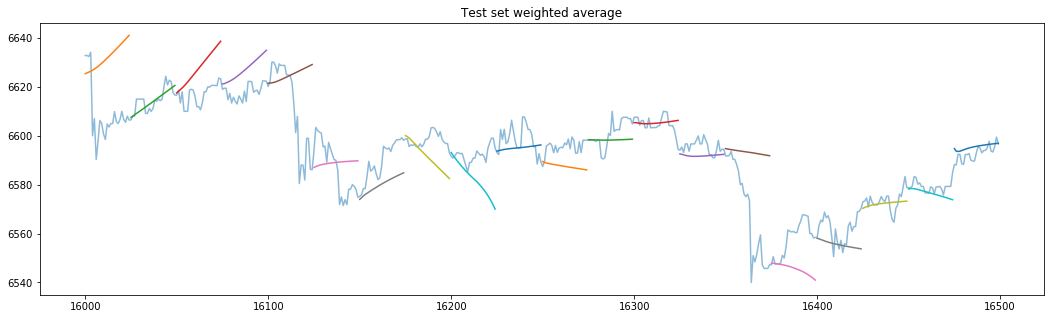

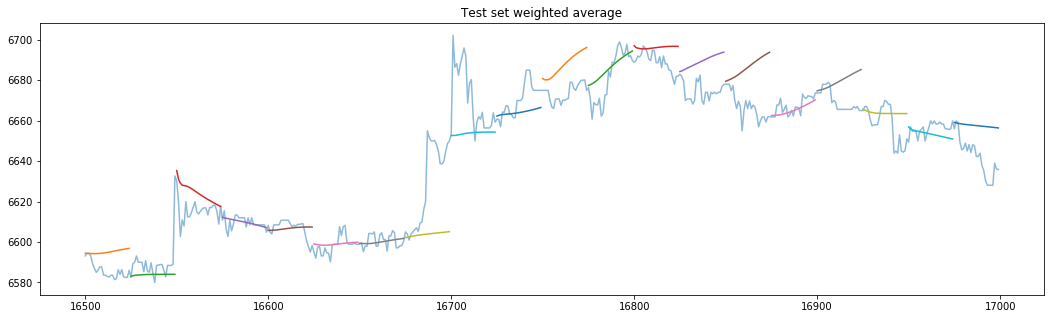

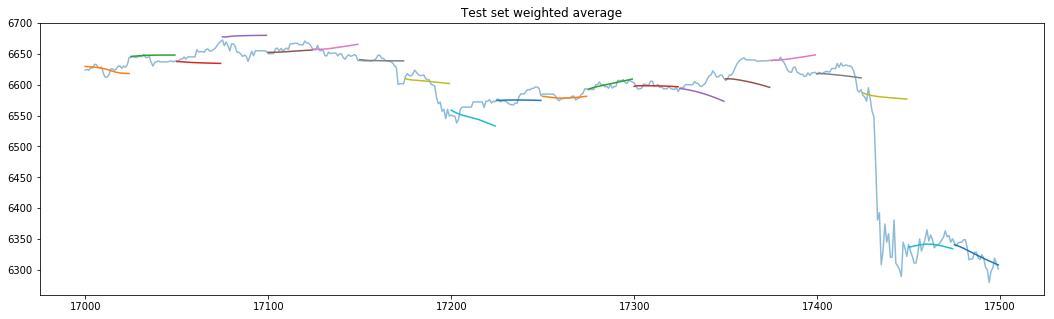

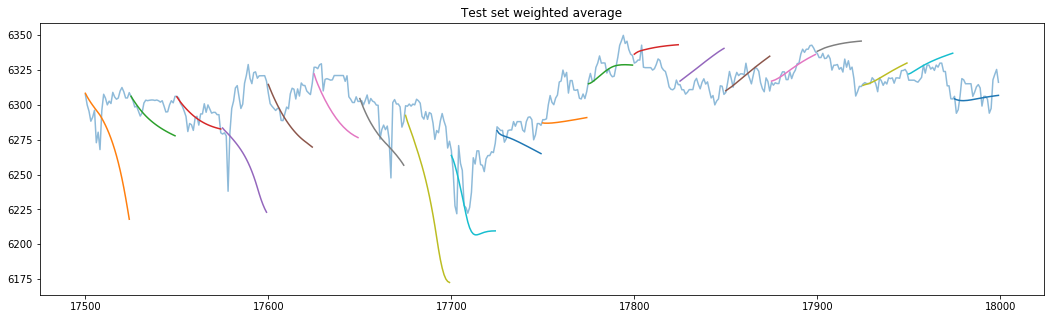

ValueError: x and y must have same first dimension, but have shapes (500,) and (271,)

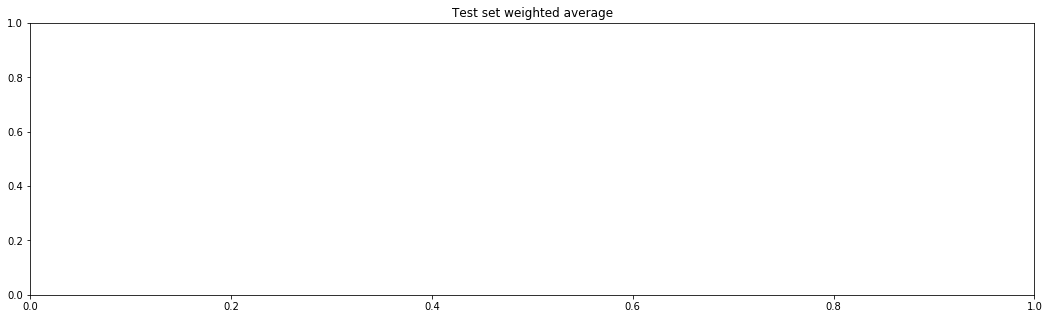

In [37]:
import matplotlib.pyplot as plt

plot_length = 500
number_of_plots = predictions.shape[0] // plot_length

for i in range(number_of_plots):
    
    plt.figure(figsize=(18, 5))
    plt.title('Test set weighted average')
    start = i*plot_length
    end = (i+1)*plot_length
    plt.plot(range(start,end), test_close[start:end], alpha=0.5)
#     plt.plot(test_close[start:end, 1], alpha=0.5)
    for k in range(start, end, prediction_range):
        plt.plot(range(start,k+prediction_range), [None for j in range(k-start)] + [x for x in pred_close[k:k+prediction_range]])
    plt.show()